In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='whitegrid')

Text(0.5, 0, 'Missed Detection')

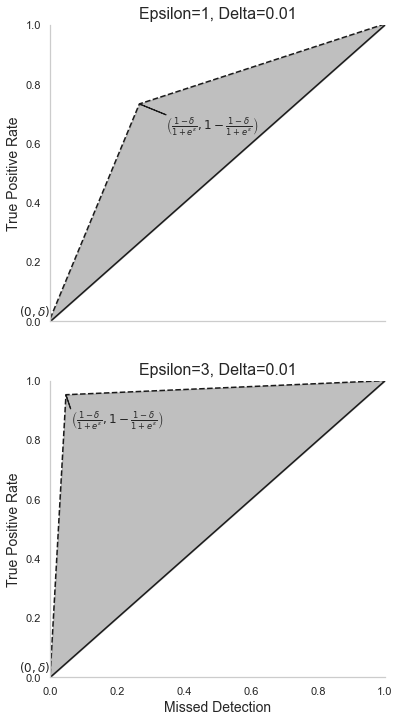

In [4]:
# Define epsilon and delta
eps_array = np.array([1., 3.])
delta = 0.01

# Plot the region
fig, axarr = plt.subplots(2, 1, figsize=(6, 12), sharex=True)

for num_plot, ax in enumerate(axarr):
  epsilon = eps_array[num_plot]

  # Define the boundaries
  x1 = np.linspace(0, 1, 1000)
  y1 = delta + np.exp(epsilon) * x1
  y2 = 1. - (1 - delta - x1) / np.exp(epsilon)
  y3 = np.min([y1, y2], axis=0)
  y_straight = x1

  ax.plot(x1, y_straight, 'k')
  ax.plot(x1, y3, 'k--')
  ax.fill_between(x1, y_straight, y3, color='gray', alpha=0.5)


  # Add annotations
  ax.text(0, delta, r'$(0, \delta)$', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

  multx = 1.3
  multy = 0.95
  x_start = (1 - delta) / (1 + np.exp(epsilon))
  y_start = 1 - (1 - delta) / (1 + np.exp(epsilon))
  ax.text(multx*x_start, multy*y_start,
          r'$\left(\frac{1-\delta}{1+e^\epsilon}, 1 - \frac{1-\delta}{1+e^\epsilon}\right)$', fontsize=12, verticalalignment='top', horizontalalignment='left')

  # Add arrow to figure from (0.5,0.5) to origin
  ax.arrow(multx*x_start, multy*y_start, (x_start - multx*x_start), (y_start - multy*y_start), fc='k', ec='k', length_includes_head=True)  # head_width=0.05, head_length=0.1*mult

  # Add labels and title
  ax.set_title(f'Epsilon={epsilon:.0f}, Delta={delta:.2f}', fontsize=16)

  # Remove spines
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  # Remove grid lines
  ax.yaxis.grid(False)
  ax.xaxis.grid(False)

  ax.set_xlim([0, 1])
  ax.set_ylim([0, 1])

  ax.set_ylabel(r'True Positive Rate', fontsize=14)
axarr[1].set_xlabel(r'Missed Detection', fontsize=14)

Text(0.5, 0, 'Missed Detection')

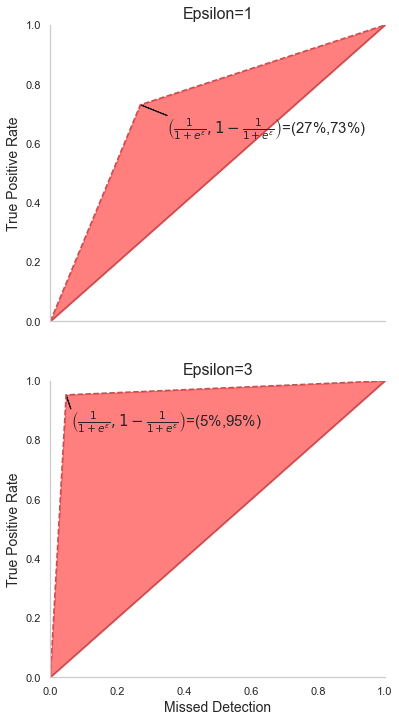

In [13]:
# No delta!

# Define epsilon
eps_array = np.array([1., 3.])

# Plot the region
fig, axarr = plt.subplots(2, 1, figsize=(6, 12), sharex=True)

for num_plot, ax in enumerate(axarr):
  epsilon = eps_array[num_plot]

  # Define the boundaries
  x1 = np.linspace(0, 1, 1000)
  y1 = np.exp(epsilon) * x1
  y2 = 1. - (1 - x1) / np.exp(epsilon)
  y3 = np.min([y1, y2], axis=0)
  y_straight = x1

  ax.plot(x1, y_straight, 'r')
  ax.plot(x1, y3, 'r--')
  ax.fill_between(x1, y_straight, y3, color='red', alpha=0.5)


  # Add annotations

  multx = 1.3
  multy = 0.95
  x_start = 1 / (1 + np.exp(epsilon))
  y_start = 1 - 1 / (1 + np.exp(epsilon))
  ax.text(
    multx*x_start, multy*y_start,
    r'$\left(\frac{1}{1+e^\epsilon}, 1 - \frac{1}{1+e^\epsilon}\right)$'
    +f'=({100/(1+np.exp(epsilon)):.0f}%,{100.-100/(1+np.exp(epsilon)):.0f}%)', fontsize=15, verticalalignment='top', horizontalalignment='left')

  # Add arrow to figure from (0.5,0.5) to origin
  ax.arrow(multx*x_start, multy*y_start, (x_start - multx*x_start), (y_start - multy*y_start), fc='k', ec='k', length_includes_head=True)  # head_width=0.05, head_length=0.1*mult

  # Add labels and title
  ax.set_title(f'Epsilon={epsilon:.0f}', fontsize=16)

  # Remove spines
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  # Remove grid lines
  ax.yaxis.grid(False)
  ax.xaxis.grid(False)

  ax.set_xlim([0, 1])
  ax.set_ylim([0, 1])

  ax.set_ylabel(r'True Positive Rate', fontsize=14)
axarr[1].set_xlabel(r'Missed Detection', fontsize=14)